# Palestine Used Car Price Data

# Introduction and Dataset Description

Welcome to the Palestine Used Car Price Data Analyst Project! Our objective is to analyze changes in used car prices in Palestine from the end of 2020 to the beginning of 2021, using various features relevant to our country.

Our Project contains Two Data set

> **Data 1 - Used Car Data and Prices in Palestine**
 > - Source: I manually updated this data that I collected during my graduation project from a different source. There are many features and rows available, but I have chosen to focus specifically on certain features and rows to align with the scope of this project.


> **Data 2 - USD to ILS Exchange Rates on Advertisement Dates.**
 > - Source: Scraped from Wise.com using BeautifulSoup (bs4).

###  <span style="color:purple"> Before delving into the data, I would like to pose some questions that I am eager to explore.</span>

### <span style="color:purple"> Step 1: Ask questions for Analysis </span>
>  **1. What is the factors are important for us to know in order know what affect the car price?**

>  **2. Is USD exchange vs NIS has an impact on the car price? - <span style="color:green"> secand dateset will help answer this question </span>**

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt

In [2]:
# if you faced an issue please Run this command  ---> pip install --upgrade matplotlib
# Then restart the Kernal in order to use updated packages.

<a id='wrangling'></a>
### <span style="color:purple"> Step 2: Data Wrangling </span>

> **This step will include the process of gather, assess, and clean on the data**

> **2.1.1 First Data -> Used Car Data and Prices in Palestine.**

> **List of data gathering methods:**
> - **<span style="color:green">Download data manually</span>**
> - **Programmatically downloading files**
> - **Gather data by accessing APIs**
> - **Gather and extract data from HTML files using BeautifulSoup**
> - **Extract data from a SQL database**

> This data contains 542 cars with 13 features for each car I preferred to keep it in Arabic language in order to have more fun while discovering. Let's take a deep dive into each column and provide a detailed explanation of the data based on the descriptions given for each field:
 > * **car_name**:- the complete make and model of the car.
 > * **year**:- The production year of the car.
 > * **price**:- The price of the car
 > * **color**:- The color of the car
 > * **origin**:- The classification of the car private carسيارة خصوصية , Taxi عمومي, driving school car تعليم قيادة
 > * **car license**:- Whether the car holds a Palestinian license or a yellow (from the occupied area).
 > * **gearbox**:- The type of gearbox the car has (e.g., Automatic غيار أوتوماتيك, Manual غيار عادي).
 > * **engine size**:- The size of the engine
 > * **ad publish date**:-  The date when the advertisement was published
 > * **features**:- List of features that the car may have
 > * **passenger**:- The number of passengers the car can accommodate
 > * **Payment method**:- The method by which the seller accepts payment

In [3]:
# read the Data and List the first 5 elemants
df = pd.read_csv('Data.csv')
df.head()

,car_name,year,price,color,fuel type,origin,car license,gearbox,engine size,ad publish date,features,passenger,Payment method
0,هونداي اكسنت,2010,30000,فيراني,بنزين,تأجير,فلسطينية,نصف اوتوماتيك,1400,26/01/2021,"مُكيّف,إغلاق مركزي,جهاز إنذار,مسجل CD,وسادة حم...",4+1,إمكانية التقسيط
1,اودي A4,2000,28000,كحلي,بنزين,خصوصي,فلسطينية,اوتوماتيك,1800,10/12/2020,"مُكيّف,إغلاق مركزي,مسجل CD,فتحة سقف,جنطات مغني...",4+1,نقدا فقط
2,مرسيدس 300,1986,13000,أبيض,ديزل,عمومي,فلسطينية,عادي,3000,29/11/2020,"فرش جلد,وسادة حماية هوائية",7+1,نقدا فقط
3,فولكسفاجن بولو,2008,38000,سكني,بنزين,خصوصي,فلسطينية,عادي,1400,09/02/2021,"مُكيّف,جنطات مغنيسيوم",4+1,إمكانية التقسيط
4,هوندا سيفيك,2007,35000,أسود,بنزين,خصوصي,فلسطينية,اوتوماتيك,1800,28/12/2020,"مُكيّف,إغلاق مركزي,جهاز إنذار,مسجل CD,جنطات مغ...",4+1,نقدا فقط


In [4]:
print('The original Size for DataFrame before do any manpuliting is -> ', df.shape)

The original Size for DataFrame before do any manpuliting is ->  (540, 13)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   car_name         540 non-null    object
 1   year             540 non-null    int64 
 2   price            540 non-null    int64 
 3   color            540 non-null    object
 4   fuel type        540 non-null    object
 5   origin           540 non-null    object
 6   car license      540 non-null    object
 7   gearbox          540 non-null    object
 8   engine size      540 non-null    int64 
 9   ad publish date  540 non-null    object
 10  features         540 non-null    object
 11  passenger        498 non-null    object
 12  Payment method   540 non-null    object
dtypes: int64(3), object(10)
memory usage: 55.0+ KB


In [6]:
df.describe()

,year,price,engine size
count,540.000000,540.000000,540.000000
mean,2008.722222,60324.061111,1765.942593
std,8.513477,41355.023378,716.253501
min,1980.000000,1200.000000,210.000000
25%,2005.000000,34750.000000,1400.000000
50%,2011.000000,53000.000000,1600.000000
75%,2015.000000,76000.000000,2000.000000
max,2019.000000,470000.000000,9999.000000


> **2.1.2 Secand Data -> USD to ILS Exchange Rates on Advertisement Dates.**

> **List of data gathering methods:**
> - **Download data manually**
> - **Programmatically downloading files**
> - **Gather data by accessing APIs**
> - **<span style="color:green">Gather and extract data from HTML files using BeautifulSoup</span>**
> - **Extract data from a SQL database**

> This dataset contains the exchange rates between US Dollars (USD) and Shekels (ILS) on specific dates when advertisements were published. Each row represents the exchange rate of 1 USD to ILS on a particular date:
 > * **Ad Publish Date**:- The date when the advertisement was published.
 > * **Exchange Rate**:- The exchange rate on the corresponding publish date, representing how many Shekels (ILS) one US Dollar (USD) was worth on that date.

In [7]:
ExchangeRate_df = pd.DataFrame()

# Copy only ad publish date column from the original DataFrame to the new DataFrame in order to use
ExchangeRate_df['ad publish date'] = df['ad publish date']
ExchangeRate_df['Exchange Rate']= ''

ExchangeRate_df

,ad publish date,Exchange Rate
0,26/01/2021,
1,10/12/2020,
2,29/11/2020,
3,09/02/2021,
4,28/12/2020,
...,...,...
535,10/02/2021,
536,10/02/2021,
537,10/02/2021,
538,10/02/2021,


In [8]:
# change the date format in order to be align with API structure with two step 
# 1. Convert 'ad publish date' to datetime format
ExchangeRate_df['ad publish date'] = pd.to_datetime(ExchangeRate_df['ad publish date'], format='%d/%m/%Y')

# 2. apply .dt.strftime() to format the dates
ExchangeRate_df['ad publish date'] = ExchangeRate_df['ad publish date'].dt.strftime('%d-%m-%Y')

In [9]:
ExchangeRate_df

,ad publish date,Exchange Rate
0,26-01-2021,
1,10-12-2020,
2,29-11-2020,
3,09-02-2021,
4,28-12-2020,
...,...,...
535,10-02-2021,
536,10-02-2021,
537,10-02-2021,
538,10-02-2021,


In [10]:
# There's alot of cars published in the same day (same date) so insted of calling the API for each date i would
# prefer to get the unique date then get the result for this date one time
unique_dates = ExchangeRate_df['ad publish date'].unique()
unique_dates

array(['26-01-2021', '10-12-2020', '29-11-2020', '09-02-2021',
       '28-12-2020', '12-01-2021', '24-11-2020', '28-01-2021',
       '03-02-2021', '27-01-2021', '03-01-2021', '14-01-2021',
       '16-12-2020', '02-02-2021', '11-01-2021', '10-02-2021',
       '01-02-2021', '12-12-2020', '17-01-2021', '04-01-2021',
       '31-12-2020', '29-12-2020', '30-01-2021', '31-01-2021',
       '16-01-2021', '11-02-2021'], dtype=object)

In [11]:
# define a Function to get exchange rate from Wise.com site
def get_exchange_rate(date):
    # Format the URL with the specified date
    url = f'https://wise.com/gb/currency-converter/usd-to-ils-rate/history/{date}'
    
    # Send a GET request to fetch the HTML content
    response = requests.get(url)
    html_content = response.content
    
    # Parse HTML using BeautifulSoup
    soup = BeautifulSoup(html_content, 'html.parser')
    
    # Find the element containing the exchange rate data
    exchange_rate_element = soup.find('span', class_='text-success')
    
    # Extract the exchange rate value
    if exchange_rate_element:
        exchange_rate = exchange_rate_element.text.strip()
        return exchange_rate
    else:
        return None

In [12]:
%time

# Create a dictionary to store exchange rates for unique dates
exchange_rates = {}

# Fetch exchange rates for all unique dates
for date in unique_dates:
    exchange_rate = get_exchange_rate(date)
    exchange_rates[date] = exchange_rate

# Map the exchange rates to the DataFrame
ExchangeRate_df['Exchange Rate'] = ExchangeRate_df['ad publish date'].map(exchange_rates)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.01 µs


In [13]:
ExchangeRate_df

,ad publish date,Exchange Rate
0,26-01-2021,3.276
1,10-12-2020,3.250
2,29-11-2020,3.318
3,09-02-2021,3.259
4,28-12-2020,3.223
...,...,...
535,10-02-2021,3.250
536,10-02-2021,3.250
537,10-02-2021,3.250
538,10-02-2021,3.250



### 2.2.1 Now Lets assest Quality Issues for the first Data-> Used Car Data and Prices in Palestine.


> **I will list all quality issue may the Data faced.**
> - Inaccurate data: Data that contains errors, mistakes, or inconsistencies. ( Accuracy )
> - Missing data: Data that is incomplete or has missing values ( Completeness ).
> - Duplicate data: Data that is repeated or duplicated within the dataset.
> - Outliers: Data points that are significantly different from other data points.
> - Inconsistent data: Data that is inconsistent in format, units, or naming conventions ( Consistency + Uniqueness ).
> - Validity

    
    
### 2.2.1.1 Check for Missing Data ( Completeness ) -> 

In [14]:
df.isnull().sum()

car_name            0
year                0
price               0
color               0
fuel type           0
origin              0
car license         0
gearbox             0
engine size         0
ad publish date     0
features            0
passenger          42
Payment method      0
dtype: int64

#### **as you can see from the previous result there's a missing data in <span style="color:red"> passenger </span> coulmn. Lets solve it**

> How to solve the missing data?
    > - I have missing data in the passenger column. Since some cars have the passenger information filled in while similar cars do not, I use the following code to fill in the missing passenger data based on the most common value (mode) of the existing data for cars with the same name. If there are no cars with passenger data, 'Unknown' is added to the passenger column

In [15]:
df['passenger'] = df.groupby(['car_name'])['passenger'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

#### check if there is a unique car in the dataset where the passenger information is still marked as 'Unknown'.


In [16]:
# check if there's a unique car in the dataset and the passenger value still UnKnown
unknown_passengers = df[df['passenger'] == 'Unknown']

unknown_passengers

,car_name,year,price,color,fuel type,origin,car license,gearbox,engine size,ad publish date,features,passenger,Payment method
389,سكودا يتي,2013,67000,فيراني,بنزين,خصوصي,فلسطينية,عادي,1200,27/01/2021,"مُكيّف,إغلاق مركزي,جهاز إنذار,مسجل CD,جنطات مغ...",Unknown,نقدا فقط


#### we found that there's still a car with Unknown value we can fill the value manually

In [17]:
# since there's a car still UnKnown we can fill the value for them manually 
df.loc[389, 'passenger'] = '4+1'

In [18]:
# check one more time for null value
df.isnull().sum()

car_name           0
year               0
price              0
color              0
fuel type          0
origin             0
car license        0
gearbox            0
engine size        0
ad publish date    0
features           0
passenger          0
Payment method     0
dtype: int64

### <span style="color:Green"> Now There's No Missing value founded and the first quality was solved</span> 

### 2.2.1.2 Check for Duplicated Data -> <span style="color:Green"> There's No Duplicated Data founded </span> 

In [19]:
sum(df.duplicated())

0

### Check for Accuracy Issue:- Inaccurate data: Data that contains errors, mistakes, or inconsistencies.  -> 

  
  > #### 1. Check visually for the issue

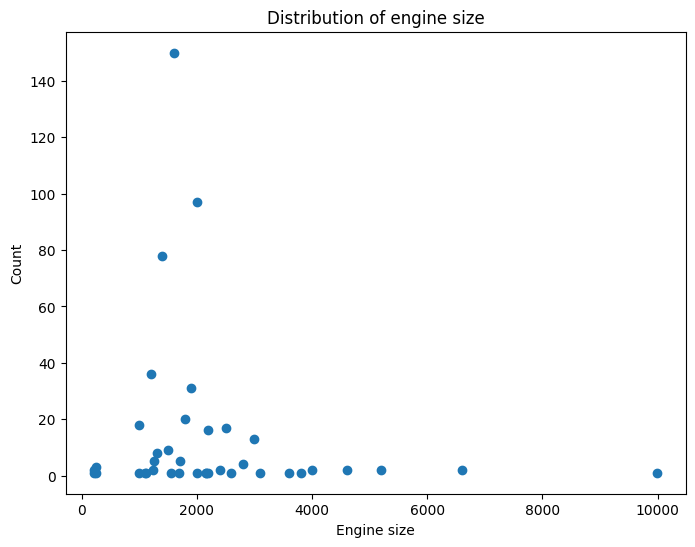

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(df['engine size'].value_counts().index, df['engine size'].value_counts().values)
plt.title('Distribution of engine size')
plt.xlabel('Engine size')
plt.ylabel('Count')
plt.show()

 ### After check the previous figure, it becomes evident that some cars have an engine size less than the expected 900cc, prompting further investigation.
 
> **Lets check programmatically for this issue to gain more understand**

In [21]:
below = df[df['engine size'] < 900]
below

,car_name,year,price,color,fuel type,origin,car license,gearbox,engine size,ad publish date,features,passenger,Payment method
64,مرسيدس 220,1996,22000,أبيض,ديزل,عمومي,فلسطينية,عادي,220,12/01/2021,"إغلاق مركزي,مسجل CD,جنطات مغنيسيوم,وسادة حماية...",4+1,نقدا فقط
253,فولفو Fl6,2000,85000,أبيض عاجي,ديزل,خصوصي,فلسطينية,عادي,210,12/12/2020,"مُكيّف,إغلاق مركزي,مسجل CD,فتحة سقف,فرش جلد,وس...",2+1,نقدا فقط
262,فولفو Fl6,2000,75000,أبيض عاجي,ديزل,خصوصي,فلسطينية,عادي,210,12/12/2020,"مُكيّف,إغلاق مركزي,جهاز إنذار,مسجل CD,فتحة سقف...",2+1,نقدا فقط
266,فولفو Fl6,2006,115000,أبيض عاجي,ديزل,خصوصي,فلسطينية,عادي,250,12/12/2020,"مُكيّف,إغلاق مركزي,جهاز إنذار,مسجل CD,فتحة سقف...",4+1,نقدا فقط
338,داف 55,2005,95000,أبيض,ديزل,تجاري,فلسطينية,عادي,250,12/01/2021,"إغلاق مركزي,جهاز إنذار",2+1,إمكانية التقسيط
464,داف 55,2005,75000,أبيض,ديزل,تجاري,فلسطينية,عادي,240,12/01/2021,"مُكيّف,إغلاق مركزي,جهاز إنذار,مسجل CD,وسادة حم...",2+1,نقدا فقط
489,دراجة نارية 2017,2017,45000,برتقالي,بنزين,خصوصي,فلسطينية,عادي,250,11/02/2021,"مُكيّف,إغلاق مركزي,جهاز إنذار,مسجل CD,وسادة حم...",1+1,إمكانية التقسيط


### After identifying the issue, we discovered that there was a missing zero in all columns, resulting in numbers such as 220 instead of 2200. We resolved this manually. There's a motorcycle in the data where it makes sense to have a smaller engine size, so we kept it as is.

In [22]:
df.loc[64, 'engine size'] = 2200
df.loc[253, 'engine size'] = 2100
df.loc[262, 'engine size'] = 2100
df.loc[266, 'engine size'] = 2500
df.loc[338, 'engine size'] = 2500
df.loc[464, 'engine size'] = 2400

In [23]:
# keep this record because its a motorcycle and the engine size is make sense 
below = df[df['engine size'] < 900]
below

,car_name,year,price,color,fuel type,origin,car license,gearbox,engine size,ad publish date,features,passenger,Payment method
489,دراجة نارية 2017,2017,45000,برتقالي,بنزين,خصوصي,فلسطينية,عادي,250,11/02/2021,"مُكيّف,إغلاق مركزي,جهاز إنذار,مسجل CD,وسادة حم...",1+1,إمكانية التقسيط


### **Check for Validity Erroneous data types** ->
 > **The passenger column contains expressions like "4+1" or "6+1", which we can convert to integers instead of treating them as strings.**

> #### 1. Check Visually for the issue

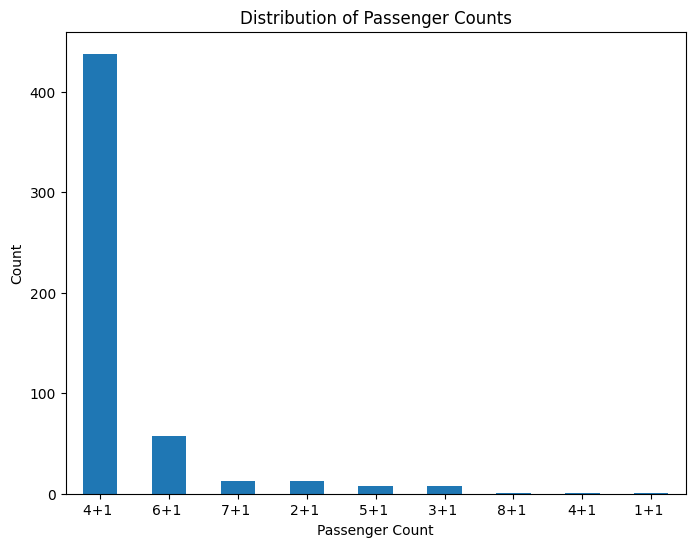

In [24]:
plt.figure(figsize=(8, 6))
df['passenger'].value_counts().plot(kind='bar', rot=0)
plt.title('Distribution of Passenger Counts')
plt.xlabel('Passenger Count')
plt.ylabel('Count')
plt.show()

> #### 2. Check programmatically for the issue
    > - Get all unique values for the passanger column

In [25]:
df['passenger'].unique()

array(['4+1 ', '7+1 ', '6+1 ', '2+1 ', '5+1 ', '3+1 ', '8+1 ', '4+1',
       '1+1 '], dtype=object)

In [26]:
# Function to calculate the total passenger count from expressions like '4+1'
def calculate_passenger(expression):
    parts = expression.split('+')
    total_passengers = sum(int(part) for part in parts)
    return total_passengers

# Apply the function to each row in the 'passenger' column
df['passenger'] = df['passenger'].apply(calculate_passenger)

**After apply the previous function we can now see that the passanger column contain integer value not string value and the <span style='color:green'> Validity Erroneous data types issue for passenger solved </span>**

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   car_name         540 non-null    object
 1   year             540 non-null    int64 
 2   price            540 non-null    int64 
 3   color            540 non-null    object
 4   fuel type        540 non-null    object
 5   origin           540 non-null    object
 6   car license      540 non-null    object
 7   gearbox          540 non-null    object
 8   engine size      540 non-null    int64 
 9   ad publish date  540 non-null    object
 10  features         540 non-null    object
 11  passenger        540 non-null    int64 
 12  Payment method   540 non-null    object
dtypes: int64(4), object(9)
memory usage: 55.0+ KB


### 2.2.1.5 Now Lets assest and clean for a tidiness issues
> I will list all tidines issue may data faced
    > - Columns containing multiple variables: Data that has multiple variables stored in a single column.
   >  - having two dataset with differnet foramt
   >  - Untidy data structure: Data that is not organized or structured in a consistent and logical manner.
   >  - Rows containing multiple observations: Data that has multiple observations stored in a single row.
   >  - Inconsistent data types: Data that has inconsistent data types within the same column.
   >  - Redundant information: Data that contains unnecessary or duplicate information.


> #### **First issue:- Check for Multiple Variables in One Column** -> <span style="color:red"> I have a column called features that contains a list of feature for the the car seprated by comma and this is an issue of columns containing multiple variables </span>

> #### 1. Check Visually for the issue

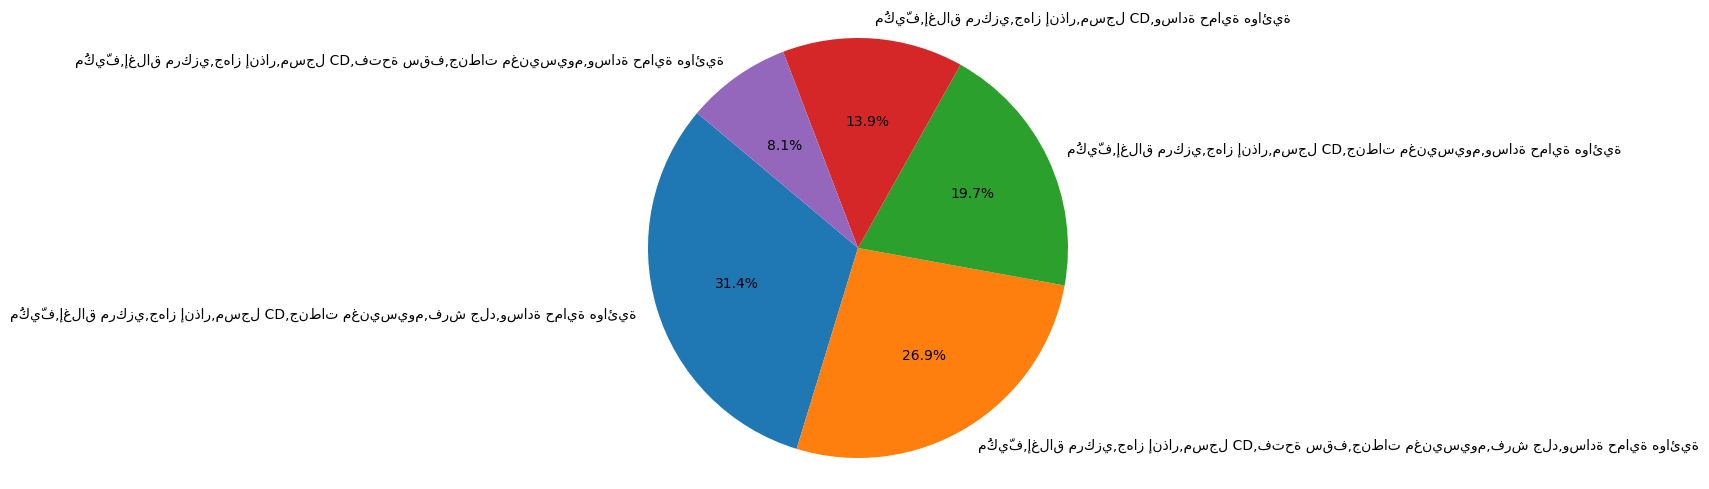

In [28]:
# get the feature counts 
feature_counts = df['features'].value_counts()  

# sort them desc in order to get the top vounts
sorted_counts = feature_counts.sort_values(ascending=False)

# Get the top 5 features because there's a lot of features
top_5_features = sorted_counts.head(5)

fig, ax = plt.subplots(figsize=(8, 6))  

ax.pie(top_5_features, labels=top_5_features.index, autopct='%1.1f%%', startangle=140)

ax.axis('equal')

plt.show()

> #### 2. Check programmatically for the issue
 > - check How value stored in features column

In [29]:
df.head(2)

,car_name,year,price,color,fuel type,origin,car license,gearbox,engine size,ad publish date,features,passenger,Payment method
0,هونداي اكسنت,2010,30000,فيراني,بنزين,تأجير,فلسطينية,نصف اوتوماتيك,1400,26/01/2021,"مُكيّف,إغلاق مركزي,جهاز إنذار,مسجل CD,وسادة حم...",5,إمكانية التقسيط
1,اودي A4,2000,28000,كحلي,بنزين,خصوصي,فلسطينية,اوتوماتيك,1800,10/12/2020,"مُكيّف,إغلاق مركزي,مسجل CD,فتحة سقف,جنطات مغني...",5,نقدا فقط


> so in order to solve this issue lets seprated this column in multiples columns by:
 > - first create 8 columns that can hold the features after seprated
 > - itrate throw each row and add 1 when the car have this feature in the list and 0 if not

In [30]:
# create a new columns that will hold the features after split

df["alarm"]=0
df["ac"]=0
df["radio_cd"]=0
df["sunroof"]=0
df["leatherـchair"]=0
df["centralـLock"]=0
df["magnesium_wheels"]=0
df["air_bag"]=0

In [31]:
lable_features=["جهاز إنذار","مُكيّف","مسجل CD","فتحة سقف","فرش جلد","إغلاق مركزي","جنطات مغنيسيوم","وسادة حماية هوائية"]

In [32]:
%%time
for row in range(0,df.shape[0]):
    features_string=df.at[row,"features"]
    if type(features_string) == str:
        features=features_string.split(",")
        if len(features) >0:
            for lable in features:
                lable=lable.strip()
                if lable in lable_features:
                    if lable == "جهاز إنذار":
                        df.at[row,"alarm"]=1;
                    elif lable == "مُكيّف":
                        df.at[row,"ac"]=1;
                    elif lable == "مسجل CD":
                        df.at[row,"radio_cd"]=1;
                    elif lable == "فتحة سقف":
                        df.at[row,"sunroof"]=1;
                    elif lable == "فرش جلد":
                        df.at[row,"leatherـchair"]=1;
                    elif lable == "إغلاق مركزي":
                        df.at[row,"centralـLock"]=1;
                    elif lable == "جنطات مغنيسيوم":
                        df.at[row,"magnesium_wheels"]=1;
                    elif lable == "وسادة حماية هوائية":
                        df.at[row,"air_bag"]=1;
        

CPU times: user 73.8 ms, sys: 909 µs, total: 74.7 ms
Wall time: 89.3 ms


**we can now safely delete the features column**

In [33]:
# we can now remove features from the dateframe 
df = df.drop('features', axis=1)

#### Secand Issue:- Inconsistent data types: Data that has inconsistent data types within the same column. -> having two dataset with differnet foramt -> the next step for us is to merge the two dataset so we will merge on ad publish date column so we should to make sure that the column in the two dataset I mean ad publish date in first dateframe and in secand dateframe has the same strucute and dtype



#### Check for date format in both dateframes 

In [34]:
print(df['ad publish date'].head(2))
print('---------------------------')
print(ExchangeRate_df['ad publish date'].head(2))

0    26/01/2021
1    10/12/2020
Name: ad publish date, dtype: object
---------------------------
0    26-01-2021
1    10-12-2020
Name: ad publish date, dtype: object


#### as you can see there's a different here so we should change the foramt for the secand dataframe

In [35]:
df['ad publish date'] = pd.to_datetime(df['ad publish date'], format='%d/%m/%Y')
df['ad publish date'] = df['ad publish date'].dt.strftime('%d-%m-%Y')

#### Check onemore time about the foramt 

In [36]:
print(df['ad publish date'].head(2))
print('---------------------------')
print(ExchangeRate_df['ad publish date'].head(2))

0    26-01-2021
1    10-12-2020
Name: ad publish date, dtype: object
---------------------------
0    26-01-2021
1    10-12-2020
Name: ad publish date, dtype: object


#### Now Both date is identical and we can merge them safely 

### We can now split the car_name column into two column make and model this will help us give more accurate result in the ML prediction step

### split the column will make car_name as a Redundant information so from here we can face the third issue Redundant information: Data that contains unnecessary or duplicate information.


In [37]:
# Assuming df is your DataFrame
df[['make', 'model']] = df['car_name'].str.split(' ', n=1, expand=True)

# Drop the original 'car_name' column
df.drop(columns=['car_name'], inplace=True)

## 2.2.1.7 combine two dateset

In [38]:
merged_df = pd.merge(df, ExchangeRate_df, on='ad publish date', how='left')

In [39]:
merged_df

,year,price,color,fuel type,origin,car license,gearbox,engine size,ad publish date,passenger,...,ac,radio_cd,sunroof,leatherـchair,centralـLock,magnesium_wheels,air_bag,make,model,Exchange Rate
0,2010,30000,فيراني,بنزين,تأجير,فلسطينية,نصف اوتوماتيك,1400,26-01-2021,5,...,1,1,0,0,1,0,1,هونداي,اكسنت,3.276
1,2010,30000,فيراني,بنزين,تأجير,فلسطينية,نصف اوتوماتيك,1400,26-01-2021,5,...,1,1,0,0,1,0,1,هونداي,اكسنت,3.276
2,2010,30000,فيراني,بنزين,تأجير,فلسطينية,نصف اوتوماتيك,1400,26-01-2021,5,...,1,1,0,0,1,0,1,هونداي,اكسنت,3.276
3,2010,30000,فيراني,بنزين,تأجير,فلسطينية,نصف اوتوماتيك,1400,26-01-2021,5,...,1,1,0,0,1,0,1,هونداي,اكسنت,3.276
4,2010,30000,فيراني,بنزين,تأجير,فلسطينية,نصف اوتوماتيك,1400,26-01-2021,5,...,1,1,0,0,1,0,1,هونداي,اكسنت,3.276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42255,2015,170000,أبيض عاجي,ديزل,خصوصي,فلسطينية,اوتوماتيك,2200,10-02-2021,5,...,1,1,1,1,1,1,1,مرسيدس,E200,3.250
42256,2015,170000,أبيض عاجي,ديزل,خصوصي,فلسطينية,اوتوماتيك,2200,10-02-2021,5,...,1,1,1,1,1,1,1,مرسيدس,E200,3.250
42257,2015,170000,أبيض عاجي,ديزل,خصوصي,فلسطينية,اوتوماتيك,2200,10-02-2021,5,...,1,1,1,1,1,1,1,مرسيدس,E200,3.250
42258,2015,170000,أبيض عاجي,ديزل,خصوصي,فلسطينية,اوتوماتيك,2200,10-02-2021,5,...,1,1,1,1,1,1,1,مرسيدس,E200,3.250


### 2.2.1.8: Export the new dateframe that contians the combined data

In [40]:
merged_df.to_csv('combined_data.csv', index=False)

<a id='eda'></a>
### <span style="color:purple"> Step 3: Perform EDA (Exploratory Data Analysis) </span>



### Research Question 1 --> ( What is the factors are important for us to know in order know what affect the car price?) 

> **Form this plot we can see that the price was affected by the year where the car was produced and the engine size**

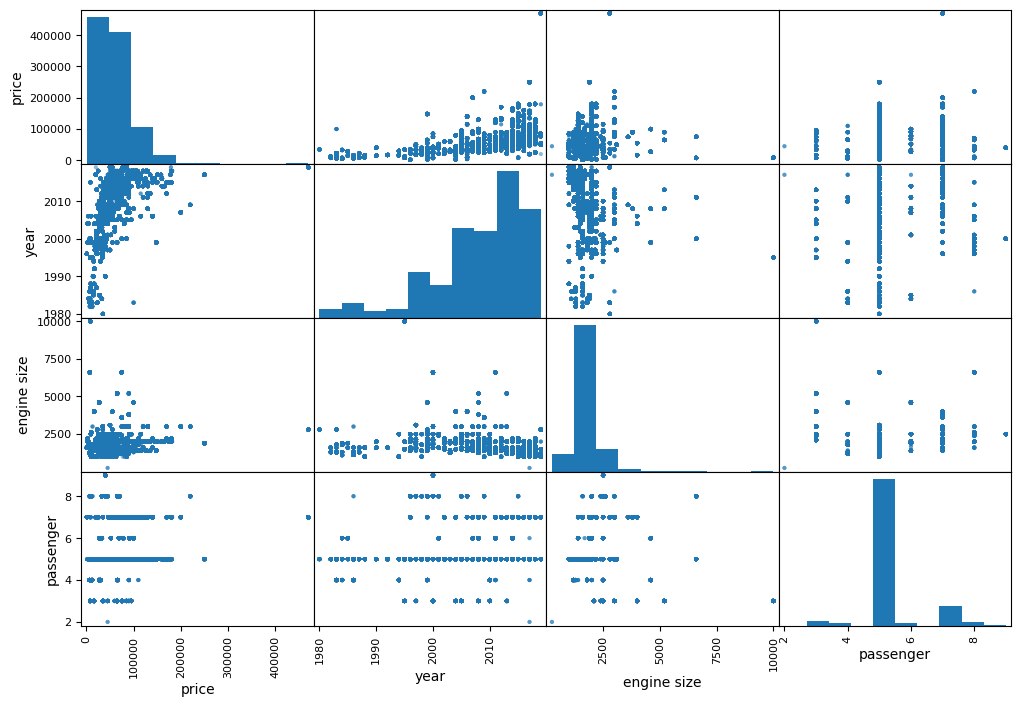

In [41]:
# Corrolation plot between some numeric columns
from pandas.plotting import scatter_matrix

attributes = ["price","year","engine size","passenger"]
scatter_matrix(merged_df[attributes], figsize=(12, 8))
plt.show()

### Research Question 1 --> ( Is USD exchange vs NIS has an impact on the car price?) 

> **The correlation between car prices and the USD to NIS exchange rate is very weak (0.053), indicating that changes in the exchange rate have little to no linear impact on car prices.**

In [42]:
correlation = merged_df['price'].corr(merged_df['Exchange Rate'])
print(f'Correlation between car price and USD to NIS exchange rate: {correlation}')

Correlation between car price and USD to NIS exchange rate: 0.05297285191916638


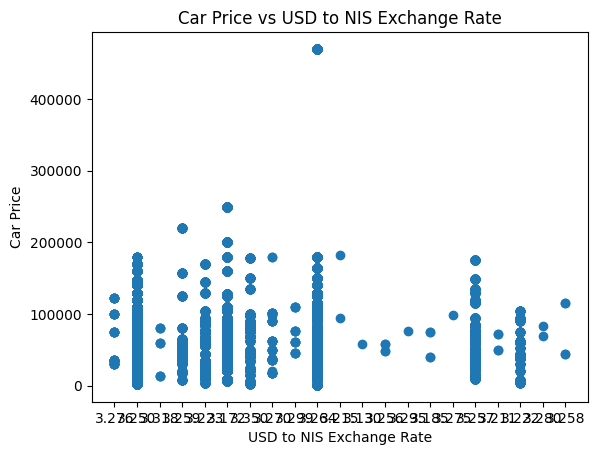

In [43]:
plt.scatter(merged_df['Exchange Rate'], merged_df['price'])
plt.xlabel('USD to NIS Exchange Rate')
plt.ylabel('Car Price')
plt.title('Car Price vs USD to NIS Exchange Rate')
plt.show()

### **5.2:** Reflection

**Thank you for reaching out!**

> There's a lot of cleaning that can be done with this data. For the purpose of this project, I focused on specific tasks, but here are additional steps I could take:
    > - Encode categorical data using one-hot encoding.
    > - Correct spelling errors in the names.
    > - Normalize nicknames (e.g., treating "Leon" and "Seat Leon" as the same).
    > - Standardize color names (e.g., grouping "ازرق سماوي", "ازرق قاتح", and "ازرق" under "ازرق").